In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
plt.close('all')

## Calculate Rwp for Rietveld refinement
### Formula source
#### http://pd.chem.ucl.ac.uk/pdnn/refine1/practice.htm
#### http://pd.chem.ucl.ac.uk/pdnn/refine1/rfacs.htm
#### https://www.diffpy.org/doc/pdffit/pdf_man.pdf

In [3]:
def rwp_delta(y_obs, y_calc, weight='count', percent=True):
    
    y_obs = np.float32(y_obs)
    y_calc = np.float32(y_calc)
    
    if weight == 'count':
        w = 1/y_obs
    else:
        w = weight
    
    delta = (w*(y_obs-y_calc)**2).sum()
    rwp_2 = delta/(w*(y_obs)**2).sum()
    
    if percent:
        p=100
    else:
        p=1
    
    return np.sqrt(rwp_2)*p, delta

### Data source: 
##### Raw PDF data: CsPbBr2_10m_2nd_20220331-155359_b18975_primary-1_mean_tth.chi
##### Bkg subtracted: CsPbBr2_10m_2nd_b18975_tth_sub_01.xy
##### Topas input file: CsPbBr2_10m_2nd_b18975_16_out.inp

In [4]:
fn = '/Users/chenghunglin/Documents/vmware/20220329_XPD_topas/CsPbBr/CsPbBr2_10m_2nd_b18975_tth_sub_01_topas.txt'
fn2 = '/Users/chenghunglin/Documents/vmware/20220329_XPD_topas/CsPbBr/CsPbBr2_10m_2nd_b18975_tth_sub_01_x.txt'
# df01 = pd.read_csv(fn, skiprows=0, sep='    ', names=['Yobs', 'Ycalc', 'diff'])
df01 = pd.read_csv(fn, skiprows=0, delim_whitespace=True, names=['Yobs', 'Ycalc', 'diff'])
df01_x = pd.read_csv(fn2, skiprows=0, delim_whitespace=True, names=['tth', 'Yobs'])

In [5]:
df01

Yobs       Ycalc       diff
0     186.338867  196.102301  -9.763434
1     208.468750  215.488741  -7.019991
2     245.446289  248.424166  -2.977877
3     293.344727  302.053772  -8.709045
4     364.939453  383.572109 -18.632656
...          ...         ...        ...
2046   49.792847   50.995831  -1.202985
2047   50.272949   51.038560  -0.765611
2048   50.239502   51.083622  -0.844120
2049   50.201294   51.130958  -0.929664
2050   50.151245   51.180502  -1.029257

[2051 rows x 3 columns]

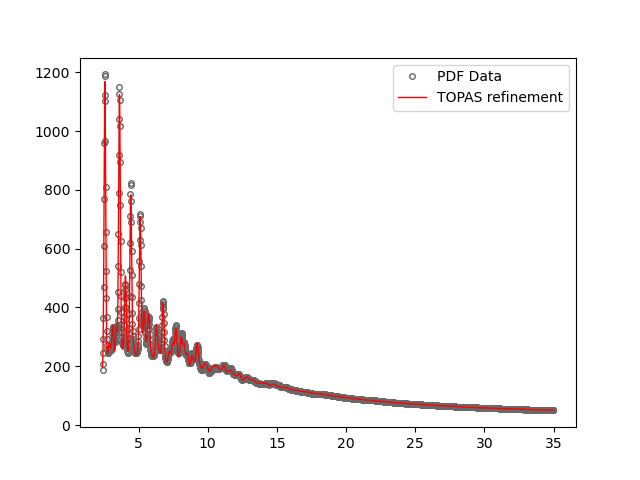

In [6]:
plt.figure()
plt.plot(df01_x['tth'], df01['Yobs'], label='PDF Data', marker='o',color='dimgrey', fillstyle='none', linestyle='None', markersize=4)
plt.plot(df01_x['tth'], df01['Ycalc'], 'r-', label='TOPAS refinement', linewidth=1)
plt.legend()

In [7]:
rwp_self, _ = rwp_delta(df01['Yobs'], df01['Ycalc'], percent=True)
print(f'Rwp calculated by self is  {rwp_self:.3f}.')
print(f'Rwp calculated in TOPAS is 2.922.')

Rwp calculated by self is  2.922.
Rwp calculated in TOPAS is 2.922.


## Calculate Rwp for DEBUSSY refinement
### Data source: 
##### Raw PDF data: CsPbBr2_10m_2nd_20220331-155359_b18975_primary-1_mean_tth.chi
##### DEBUSSY input file: CsPbBr_1341552.dwa

In [8]:
fn = '/Users/chenghunglin/Documents/20220329_XPD_DSE/CsPbBr2_10m_2nd_b18975/DFA_1341552_01/CsPbBr2_10m_2nd_b18975_tth_Best.cal'
df02 = pd.read_csv(fn, header=None, skiprows=2, sep=' ')
df03 = df02.dropna(axis=1).rename(columns={0:'theta', 2:'obs', 8:'cal', 14:'cal1', 20:'cal2', 26:'bkg'})

In [9]:
df03

theta          obs          cal       cal1        cal2         bkg
0      1.510736   9809.64551   9601.21735  47.829983  9553.38737  9187.91186
1      1.526638   9849.08301   9692.23269  48.221718  9644.01097  9279.80248
2      1.542541   9951.58008   9816.08813  48.621344  9767.46679  9404.51958
3      1.558443  10060.91990   9917.47819  48.833982  9868.64421  9506.95259
4      1.574346  10120.33500  10030.30640  48.815855  9981.49051  9621.04880
...         ...          ...          ...        ...         ...         ...
2416  39.931130   1653.34863   1652.09753  14.672697  1637.42483  1589.73748
2417  39.947033   1653.29663   1651.99108  14.669878  1637.32121  1589.66942
2418  39.962935   1653.18848   1651.97412  14.668182  1637.30593  1589.69014
2419  39.978838   1653.29590   1651.96666  14.667789  1637.29887  1589.71949
2420  39.994740   1653.30176   1651.87031  14.668899  1637.20141  1589.65886

[2421 rows x 6 columns]

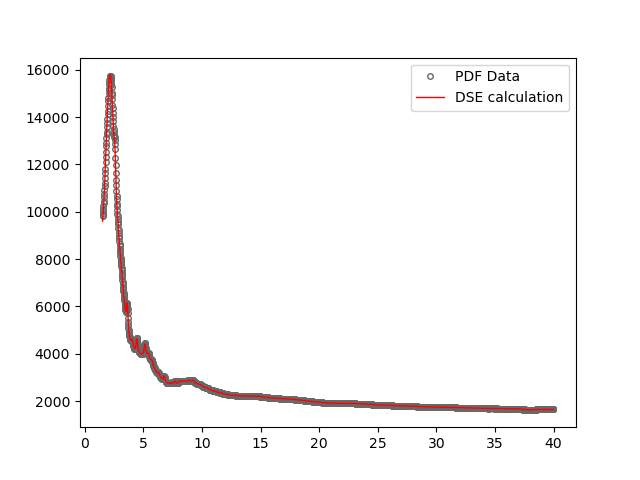

In [10]:
plt.figure()
plt.plot(df03['theta'], df03['obs'], label='PDF Data', marker='o',color='dimgrey', fillstyle='none', linestyle='None', markersize=4)
plt.plot(df03['theta'], df03['cal'], 'r-', label='DSE calculation', linewidth=1)
plt.legend()

In [11]:
rwp_self, _ = rwp_delta(df03['obs'], df03['cal'], percent=True)
print(f'Rwp calculated by self is    {rwp_self:.3f}.')
print(f'Rwp calculated in DEBUSSY is 0.482.')

Rwp calculated by self is    0.482.
Rwp calculated in DEBUSSY is 0.482.


## Calculate Rw for PDFgui refinement
### Data source: 
##### Raw PDF data: CsPbBr2_10m_2nd_20220331-155359_b18975_primary-1_mean_q.chi
##### PDFgui project file: /Users/chenghunglin/Documents/20220329_XPD_DSE/VCMFitsTwoPhase(Sol) (Final).ddp
##### - Orthorhombic_pnma (Br)
##### - CsPbBr3_mp-567629_symmetrized.cif
##### - CsPbBr3.gr

In [12]:
fn = '/Users/chenghunglin/Documents/20220329_XPD_DSE/CsPbBr3_mp-567629.txt'
df04 = pd.read_csv(fn, skiprows=4, sep=' ', names=['r', 'Gtrunc', 'Gdiff', 'Gcalc'])

In [13]:
df04

r    Gtrunc     Gdiff     Gcalc
0      1.99 -0.419274 -0.203479 -0.215795
1      2.00 -0.423520 -0.180165 -0.243355
2      2.01 -0.427469 -0.156891 -0.270578
3      2.02 -0.431017 -0.133923 -0.297094
4      2.03 -0.434018 -0.111471 -0.322547
...     ...       ...       ...       ...
5797  59.96  0.010952 -0.000777  0.011729
5798  59.97  0.010559 -0.000987  0.011545
5799  59.98  0.010204 -0.001142  0.011345
5800  59.99  0.009894 -0.001234  0.011128
5801  60.00  0.009622 -0.001273  0.010895

[5802 rows x 4 columns]

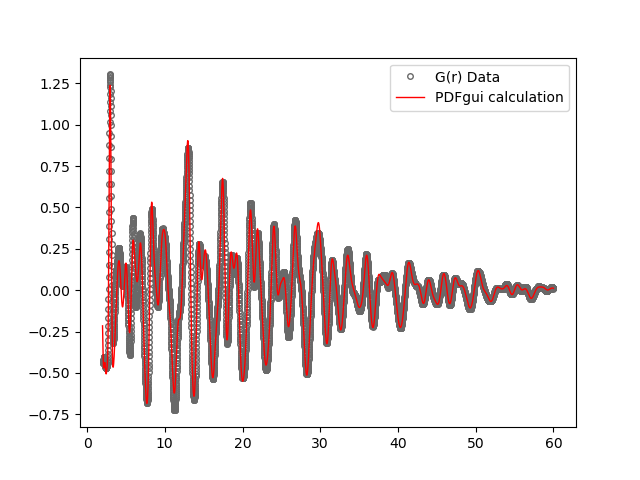

In [14]:
plt.figure()
plt.plot(df04['r'], df04['Gtrunc'], label='G(r) Data', marker='o',color='dimgrey', fillstyle='none', linestyle='None', markersize=4)
plt.plot(df04['r'], df04['Gcalc'], 'r-', label='PDFgui calculation', linewidth=1)
plt.legend()

In [15]:
rwp_self, _ = rwp_delta(df04['Gtrunc'], df04['Gcalc'], weight=1, percent=False)
print(f'Rw calculated by self is   {rwp_self:.3f}.')
print(f'Rw calculated in PDFgui is 0.174.')

Rw calculated by self is   0.174.
Rw calculated in PDFgui is 0.174.
